In [57]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "03_Clustering_Marketing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zabihullah18/students-social-network-profile-clustering",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1914134849.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'students-social-network-profile-clustering' dataset.
First 5 records:    gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0  

In [58]:
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
import pandas as pd

# Example: cleaning gradyear and age
df['gradyear'] = pd.to_numeric(df['gradyear'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows where conversion failed (NaN values)
df = df.dropna(subset=['gradyear','age'])

# Encode gender
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Select features again
features = ['gradyear','age','NumberOffriends','swimming',
            'basketball','clothes','soccer','shopping','volleyball'] + [col for col in df.columns if 'gender_' in col]

X = df[features]

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Cleaned and scaled features:", X.shape)

Cleaned and scaled features: (12228, 10)


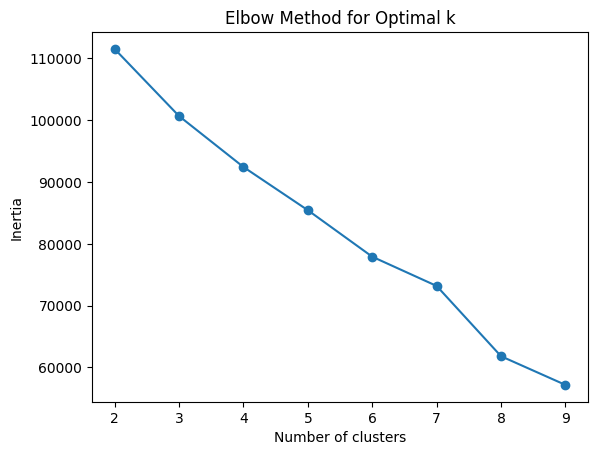

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Choose number of clusters (use elbow method)
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

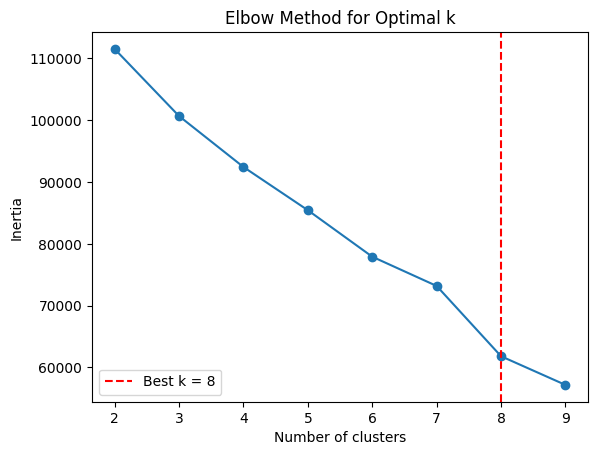

Optimal number of clusters (best k): 8


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute inertia for k=2..10
inertia = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Calculate relative drop in inertia
diffs = np.diff(inertia)

# Find elbow as the point where drop becomes small
best_k = K[np.argmin(diffs) + 1]   # +1 because diffs is one shorter

# Plot elbow curve
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")

# Highlight best k
plt.axvline(best_k, color='red', linestyle='--', label=f"Best k = {best_k}")
plt.legend()
plt.show()

print("Optimal number of clusters (best k):", best_k)


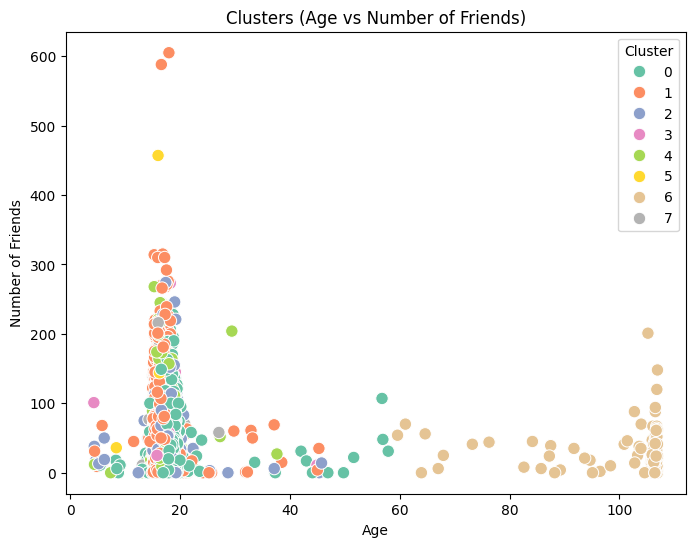

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Run KMeans with chosen k (example: k=6)
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Plot clusters using two original features (age vs NumberOffriends)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['age'],
    y=df['NumberOffriends'],
    hue=df['Cluster'],
    palette="Set2",
    s=80
)
plt.title("Clusters (Age vs Number of Friends)")
plt.xlabel("Age")
plt.ylabel("Number of Friends")
plt.legend(title="Cluster")
plt.show()

Number of outliers: 441
Outlier rows:
        gradyear     age  NumberOffriends  basketball  football  soccer  \
20         2008  17.150                0           0         0       0   
99         2008  17.281               23           4         0       0   
103        2006  18.502              242           0         0       0   
118        2009  15.882               56           4         0       0   
143        2007  17.747               75           0         0       0   
...         ...     ...              ...         ...       ...     ...   
14793      2007  17.385               75           4         3       4   
14795      2006  18.921               29           4         0       0   
14800      2006  18.396               22           5         1       0   
14808      2009  15.964              201           0         1       0   
14852      2007  17.350               12           1         2       0   

       softball  volleyball  swimming  cheerleading  ...  clothes  holli

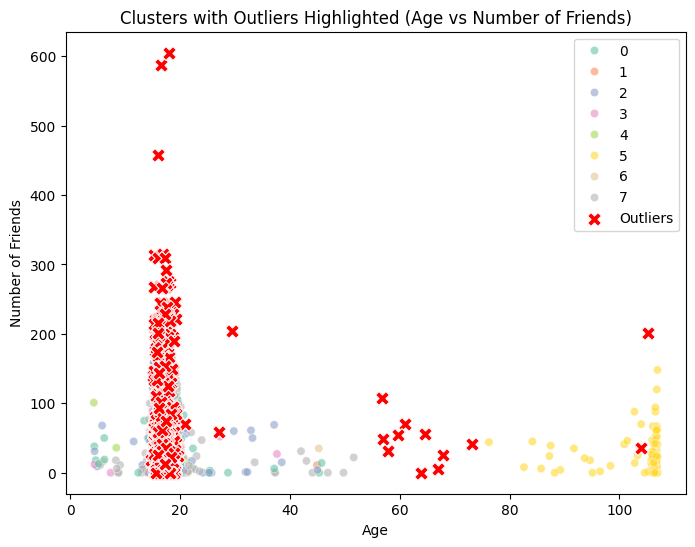

In [63]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_scaled is your cleaned, scaled feature matrix
# Run K-Means with chosen k (example: k=6 from elbow method)
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels
df['Cluster'] = clusters

# Compute distances to cluster centroids
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[clusters], axis=1)

# Define threshold: mean + 2*std deviation
threshold = distances.mean() + 2 * distances.std()

# Flag outliers
df['Outlier'] = distances > threshold

print("Number of outliers:", df['Outlier'].sum())
print("Outlier rows:\n", df[df['Outlier'] == True])

# ---- Visualization without PCA ----
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['age'],
    y=df['NumberOffriends'],
    hue=df['Cluster'],
    palette="Set2",
    alpha=0.6
)

# Highlight outliers
sns.scatterplot(
    x=df.loc[df['Outlier'], 'age'],
    y=df.loc[df['Outlier'], 'NumberOffriends'],
    color='red', marker='X', s=100, label='Outliers'
)

plt.title("Clusters with Outliers Highlighted (Age vs Number of Friends)")
plt.xlabel("Age")
plt.ylabel("Number of Friends")
plt.legend()
plt.show()

In [64]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame and X_scaled is your scaled feature matrix
# distances were already computed earlier
threshold = distances.mean() + 2 * distances.std()

# Keep only non-outliers
mask = distances <= threshold
X_clean = X_scaled[mask]
df_clean = df[mask].copy()

# Re-run KMeans with optimal k (example: k=6 from elbow method)
kmeans_clean = KMeans(n_clusters=8, random_state=42)
clusters_clean = kmeans_clean.fit_predict(X_clean)

# Add cluster labels to cleaned DataFrame
df_clean['Cluster'] = clusters_clean

# Inspect cluster profiles directly (no PCA)
cluster_profiles = df_clean.groupby('Cluster').mean()
print(cluster_profiles)

            gradyear         age  NumberOffriends  basketball  football  \
Cluster                                                                   
0        2007.725859   17.052778        90.609656    0.266776  0.256137   
1        2007.328125   17.528296        22.804451    0.241477  0.437500   
2        2007.743590   16.907227        32.571429    0.465201  0.454212   
3        2007.910112  103.460933        26.067416    0.146067  0.168539   
4        2008.500314   16.313436        19.615819    0.202448  0.188010   
5        2006.460953   18.277605        19.216803    0.139555  0.153933   
6        2007.574586   17.149001        28.548803    0.275322  0.346225   
7        2007.672794   17.169265        33.154412    0.356618  0.441176   

           soccer  softball  volleyball  swimming  cheerleading  ...  \
Cluster                                                          ...   
0        0.120295  0.243863    0.088380  0.152209      0.200491  ...   
1        0.092803  0.006629    0.

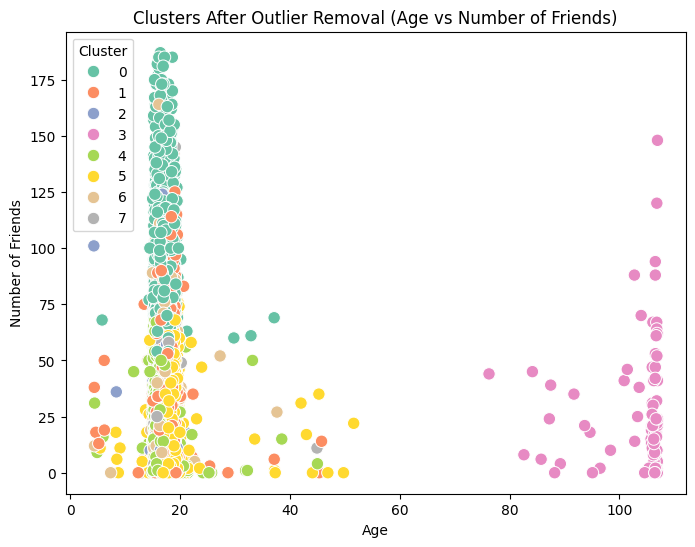

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assume X_clean is your scaled feature matrix after outlier removal
# and df_clean is the corresponding DataFrame

# Run KMeans with chosen k (example: k=4)
kmeans_clean = KMeans(n_clusters=8, random_state=42)
clusters_clean = kmeans_clean.fit_predict(X_clean)

# Add cluster labels
df_clean['Cluster'] = clusters_clean

# Plot clusters using two original features (age vs NumberOffriends)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_clean['age'],
    y=df_clean['NumberOffriends'],
    hue=df_clean['Cluster'],
    palette="Set2",
    s=80
)
plt.title("Clusters After Outlier Removal (Age vs Number of Friends)")
plt.xlabel("Age")
plt.ylabel("Number of Friends")
plt.legend(title="Cluster")
plt.show()


Cluster Profiles:
             gradyear         age  NumberOffriends  basketball  football  \
Cluster                                                                   
0        2007.334564   17.522999        24.307337    0.306876  0.445316   
1        2007.728814   17.103885        36.467797    0.501695  0.481356   
2        2008.482824   16.341991        33.201785    0.241277  0.196646   
3        2007.593861   17.149453        36.500590    0.558442  0.393152   
4        2007.761329   16.918807        41.700906    0.758308  0.492447   
5        2007.897959  100.760408        28.653061    0.163265  0.173469   
6        2007.828395   16.939981        36.702469    0.286420  0.316049   
7        2006.475270   18.278517        27.510168    0.163696  0.165955   

           soccer  softball  volleyball  swimming  cheerleading  ...  \
Cluster                                                          ...   
0        0.107060  0.006922    0.021689  0.037840      0.005076  ...   
1        5.040

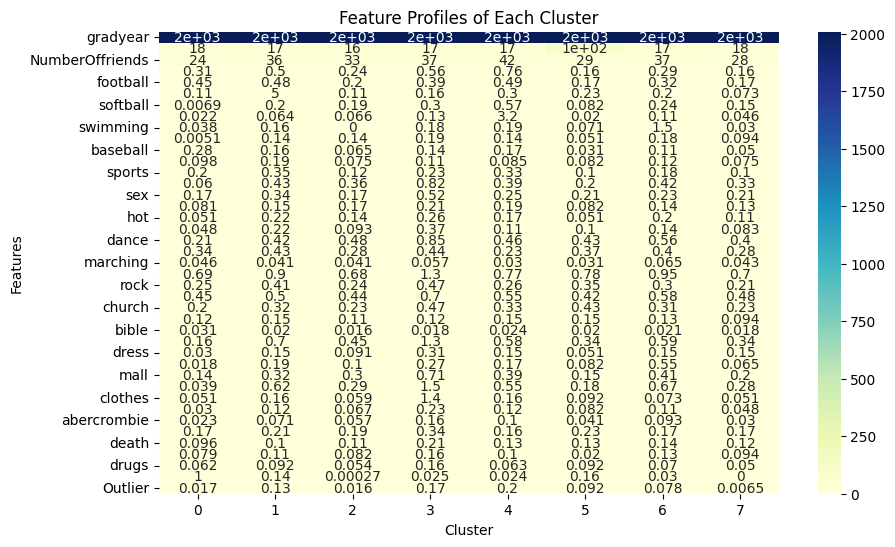

In [66]:
# Group by cluster and compute mean values of features
cluster_profiles = df.groupby('Cluster').mean()

print("Cluster Profiles:\n", cluster_profiles)

# Optional: visualize as a heatmap for easier comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profiles.T, annot=True, cmap="YlGnBu")
plt.title("Feature Profiles of Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

In [67]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.307
K=3, Silhouette Score=0.140
K=4, Silhouette Score=0.152
K=5, Silhouette Score=0.237
K=6, Silhouette Score=0.283
K=7, Silhouette Score=0.233
K=8, Silhouette Score=0.238
K=9, Silhouette Score=0.250
K=10, Silhouette Score=0.260


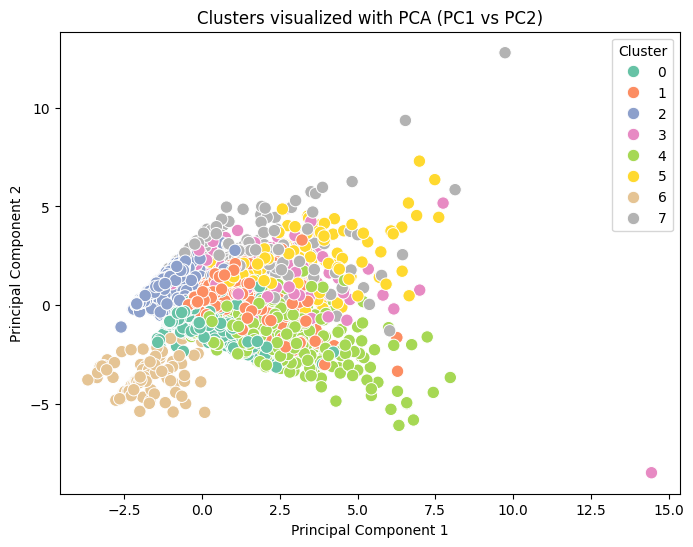

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Run KMeans with chosen k (example: k=8)
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot clusters in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=pca_df['Cluster'],
    palette="Set2",
    s=80
)
plt.title("Clusters visualized with PCA (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()